In [1]:
import pandas as pd
import math as mt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("events.csv",low_memory = False)

In [3]:
df.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [5]:
df.isnull().sum()

timestamp                         0
event                             0
person                            0
url                          928532
sku                          447450
model                        447004
condition                    447452
storage                      447452
color                        447452
skus                         789589
search_term                  962321
staticpage                  1007690
campaign_source              928492
search_engine                960331
channel                      923910
new_vs_returning             923910
city                         923910
region                       923910
country                      923910
device_type                  923910
screen_resolution            923910
operating_system_version     923910
browser_version              923910
dtype: int64

Text(0,0.5,u'frecuencia')

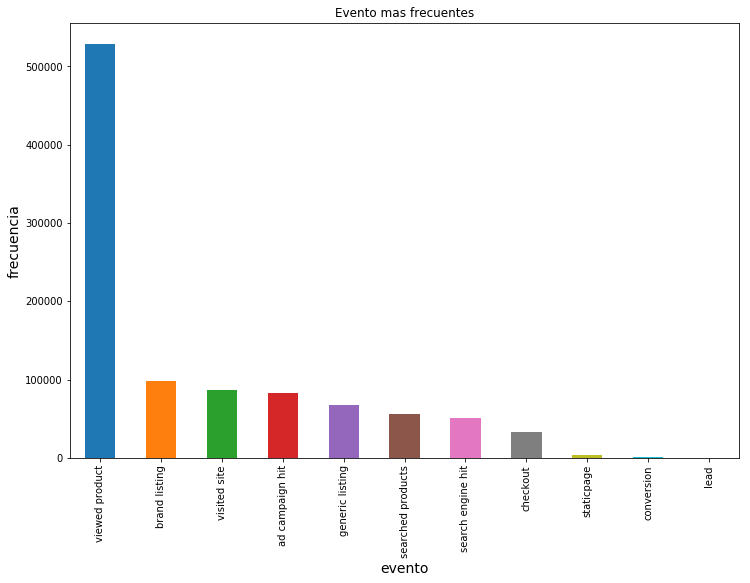

In [54]:
plot = df.groupby('event').size().sort_values(0,ascending=False).\
    plot(kind='bar',title='Evento mas frecuentes',rot=90,figsize=(12,8))
plot.set_xlabel("evento", fontsize=14)
plot.set_ylabel("frecuencia", fontsize=14)

Text(0,0.5,u'# hits')

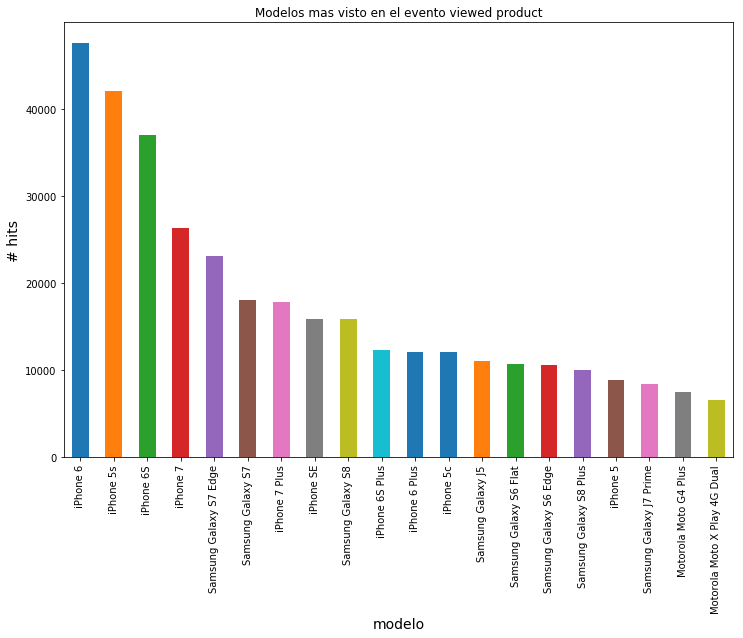

In [53]:
plot = df.loc[df['event']=='viewed product',:].dropna(subset=['model']).groupby('model').size()\
    .sort_values(0,ascending=False).head(20).\
    plot(kind='bar',title='Modelos mas visto en el evento viewed product',rot=90,figsize=(12,8))
plot.set_xlabel("modelo", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)

Text(0,0.5,u'# hits')

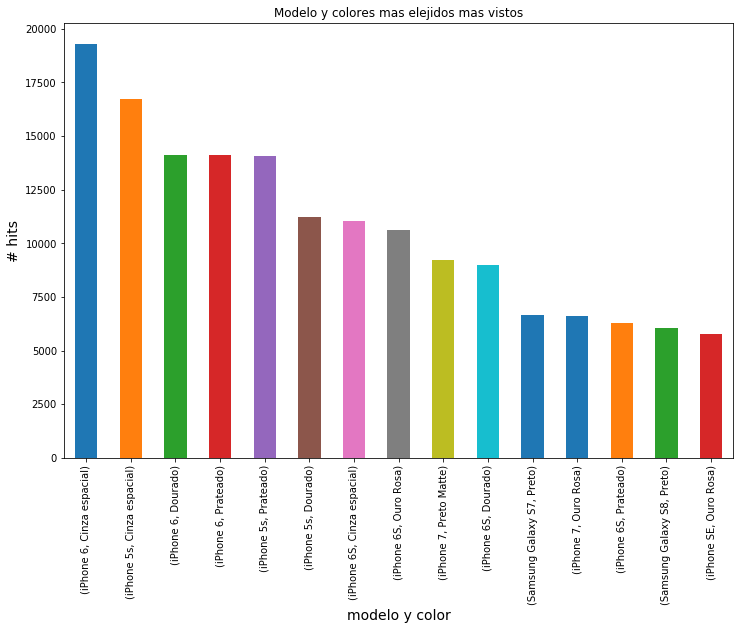

In [52]:
plot = df.loc[df['event']=='viewed product',['model', 'color']].groupby(['model','color']).size()\
    .sort_values(0,ascending=False).head(15).\
    plot(kind='bar',title='Modelo y colores mas elejidos mas vistos',rot=90,figsize=(12,8))
plot.set_xlabel("modelo y color", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)

In [14]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.month

In [15]:
df2 = df.loc[:,['month', 'model']].dropna(subset=['model'])

Text(0,0.5,u'# hits')

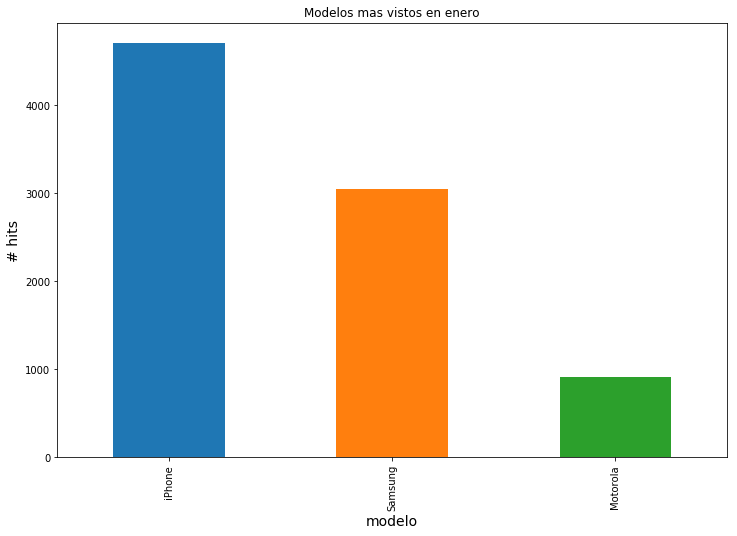

In [17]:
plot = df2.loc[df2['month']==1,:].groupby('model').size().sort_values(0,ascending=False).head(3).\
    plot(kind='bar',title='Modelos mas vistos en enero',rot=90,figsize=(12,8))
plot.set_xlabel("modelo", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)

Text(0,0.5,u'# hits')

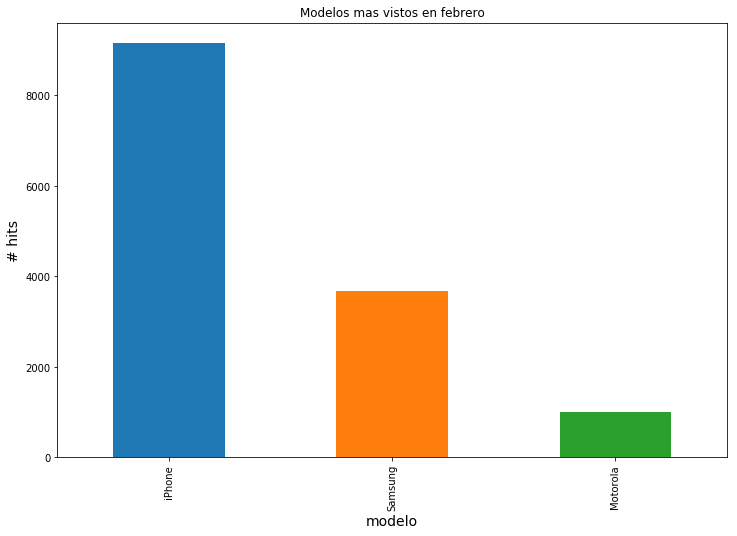

In [19]:
plot = df2.loc[df2['month']==2,:].groupby('model').size().sort_values(0,ascending=False).head(3).\
    plot(kind='bar',title='Modelos mas vistos en febrero',rot=90,figsize=(12,8))
plot.set_xlabel("modelo", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)

Text(0,0.5,u'# hits')

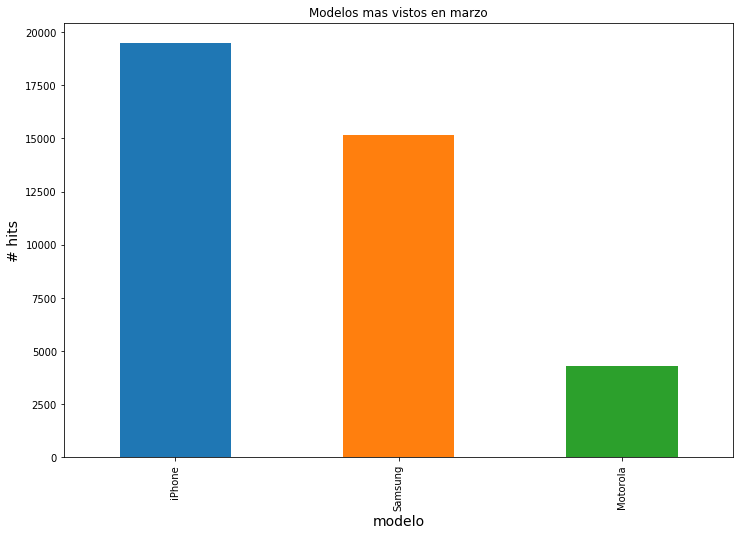

In [20]:
plot = df2.loc[df2['month']==3,:].groupby('model').size().sort_values(0,ascending=False).head(3).\
    plot(kind='bar',title='Modelos mas vistos en marzo',rot=90,figsize=(12,8))
plot.set_xlabel("modelo", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)

Text(0,0.5,u'# hits')

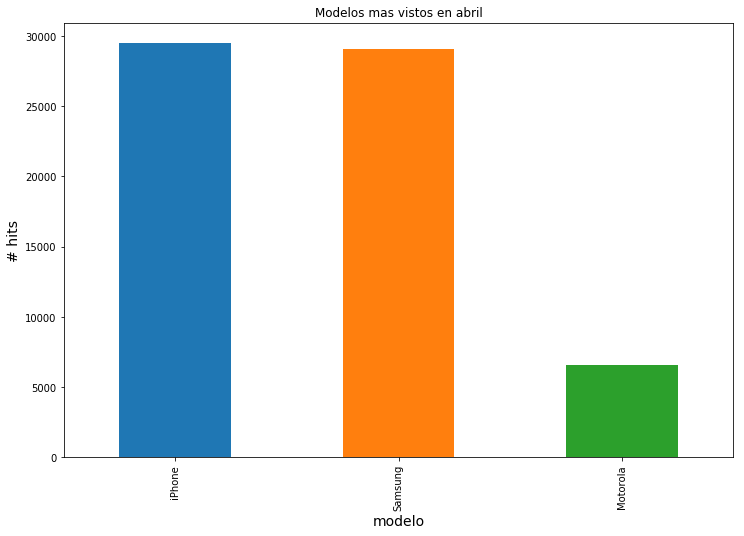

In [21]:
plot = df2.loc[df2['month']==4,:].groupby('model').size().sort_values(0,ascending=False).head(3).\
    plot(kind='bar',title='Modelos mas vistos en abril',rot=90,figsize=(12,8))
plot.set_xlabel("modelo", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)

Text(0,0.5,u'# hits')

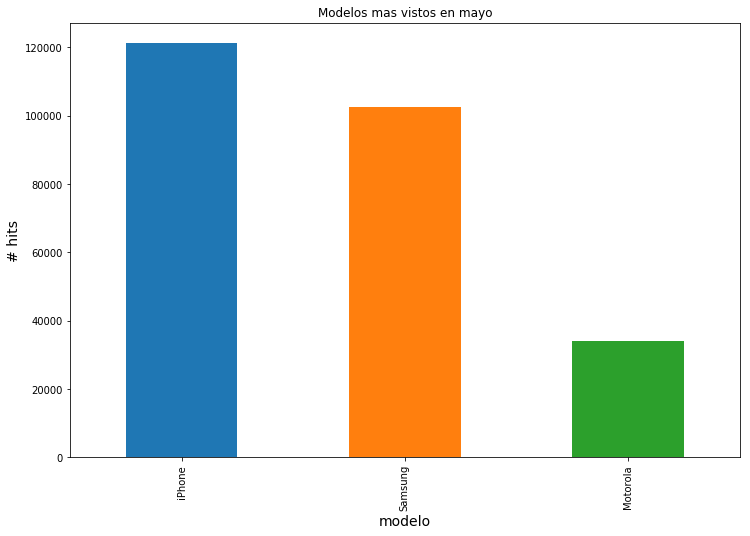

In [22]:
plot = df2.loc[df2['month']==5,:].groupby('model').size().sort_values(0,ascending=False).head(3).\
    plot(kind='bar',title='Modelos mas vistos en mayo',rot=90,figsize=(12,8))
plot.set_xlabel("modelo", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)

Text(0,0.5,u'# hits')

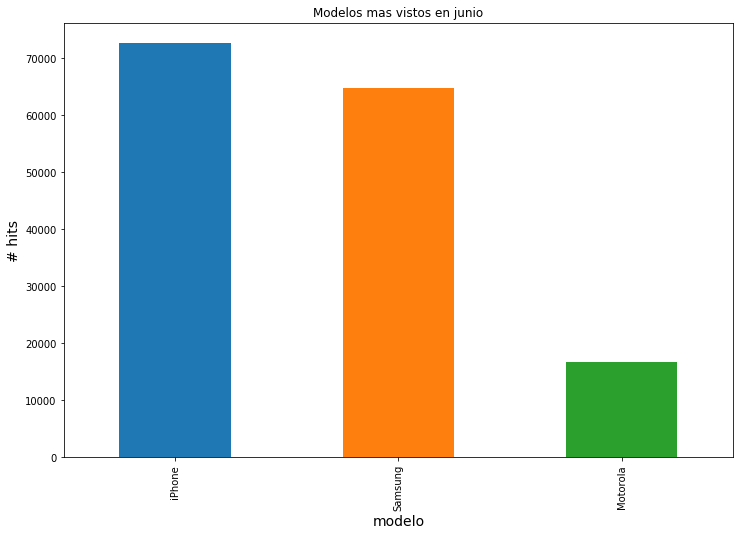

In [23]:
plot = df2.loc[df2['month']==6,:].groupby('model').size().sort_values(0,ascending=False).head(3).\
    plot(kind='bar',title='Modelos mas vistos en junio',rot=90,figsize=(12,8))
plot.set_xlabel("modelo", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)

In [3]:
colores = ["Cinza","Dourado","Preto","Rosa","Branco","Azul","Cabernet","Verde","Couro","Prateado","Vermelho","Branco","Platinum","Ouro","Marrom","Bambu","Framboesa","Black","Verde","Cobre","Olympic","Prata","Titânio","Ametista","Pink","Rouge","Iuna","Amarelo","Ônix","Indigo","Roxo","Cromo","Rose","Turquesa","Coral","Vinho","Silver"]
llamativo = ["espacial","Matte","Ouro","Couro","Cromo","Platinum","Topázio","Piano","Água","Edition","Coral","Titânio","Brilhante","Ametista","Safira","Navy","Ônix","Tabaco","Asfalto"]

ambas = colores + llamativo

def color(row) :
    obj = row["color"]
    if(pd.isnull(obj)):
        return obj
    
    if(obj == ""):
        return float("NaN")
    
    list = obj.split(" ")
    true_list = []
    
    for word in list:
        if word in colores:
            true_list.append(word)
            
    value = False
    for word in list:
        if word in llamativo:
                value = True
    row["color_llamativo"] = value
    
    #debug
   # if len(true_list) != len(list):
    #    for word in list:
     #       if word not in ambas:
      #          print (word)
       #         ambas.append(word)
    
    return ' '.join(word for word in true_list)

df["color_llamativo"] = float("NaN")
df["color_simple"] = df.loc[:,["color","color_llamativo"]].apply(color,axis = 1)

In [4]:
def color2(obj):
    if(pd.isnull(obj)):
        return obj
    
    obj = obj.replace("Ouro","Dourado")
    obj = obj.replace("Cabernet","Roxo")
    obj = obj.replace("Couro","Marrom")
    obj = obj.replace("Platinum","Prateado")
    obj = obj.replace("Black","Preto")
    obj = obj.replace("Prata","Prateado")
    obj = obj.replace("Bambu","Vermelho")
    obj = obj.replace("Framboesa","Roxo")
    obj = obj.replace("Titânio","Prateado")
    obj = obj.replace("Ametista","Turquesa")
    obj = obj.replace("Pink","Rosa")
    obj = obj.replace("Ônix","Preto")
    obj = obj.replace("Cromo","Prateado")
    obj = obj.replace("Silver","Prateado")
    obj = obj.replace("Verde","Vermelho")
    obj = obj.replace("Rose","Rosa")
    obj = obj.replace("Coral","Rosa")
    return obj
    
df["color_simple"] = df["color_simple"].apply(color2)


In [5]:
colores_relevancia = ["Rosa","Vermelho","Marrom","Azul","Dourado","Roxo","Branco"]

def color3(obj):
    if(pd.isnull(obj)):
        return obj
    
    list = obj.split(" ")
    
    if len(list) == 1:
        return obj
    
    for word in list:
        if word in colores_relevancia:
            return word
    
    
    
    
    
    return obj
    
df["color_simple"] = df["color_simple"].apply(color3)

In [6]:
df["color_simple"].value_counts()

Preto       156654
Dourado     151929
Prateado     77185
Cinza        69014
Branco       58977
Rosa         17248
Azul         11081
Vermelho      9784
Turquesa      7420
Roxo          1289
Amarelo        843
Olympic        698
Indigo         659
Marrom         527
Rouge          310
Iuna           138
Cobre           80
Name: color_simple, dtype: int64

In [7]:
df['model'].value_counts()

iPhone 6                                     50916
iPhone 5s                                    44878
iPhone 6S                                    39296
iPhone 7                                     27556
Samsung Galaxy S7 Edge                       23926
Samsung Galaxy S7                            19337
iPhone 7 Plus                                18792
Samsung Galaxy S8                            16959
iPhone SE                                    16531
Samsung Galaxy J5                            13044
iPhone 6S Plus                               12855
iPhone 6 Plus                                12766
iPhone 5c                                    12689
Samsung Galaxy S6 Flat                       11608
Samsung Galaxy S6 Edge                       11175
Samsung Galaxy S8 Plus                       10502
iPhone 5                                      9342
Samsung Galaxy J7 Prime                       9312
Motorola Moto G4 Plus                         8080
Samsung Galaxy J7              

Text(0,0.5,u'# hits')

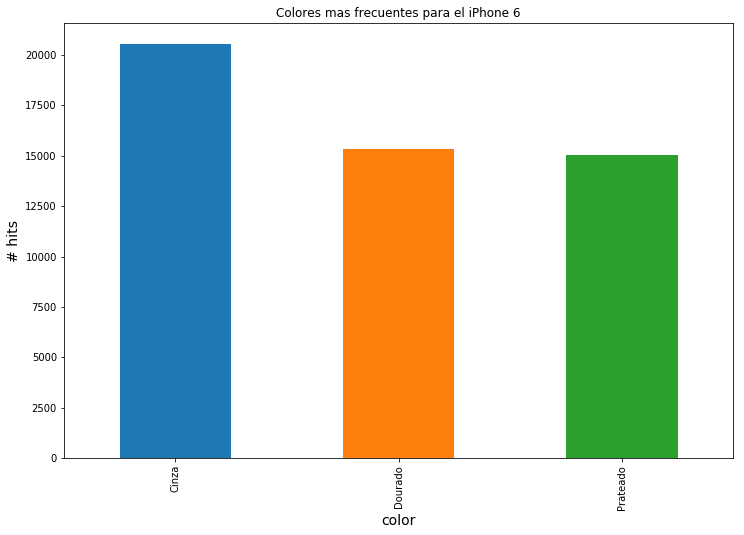

In [17]:
plot = df.loc[df['model']=="iPhone 6",:].groupby('color_simple').size().sort_values(0,ascending=False).head(10).\
    plot(kind='bar',title='Colores mas frecuentes para el iPhone 6',rot=90,figsize=(12,8))
plot.set_xlabel("color", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)

Text(0,0.5,u'# hits')

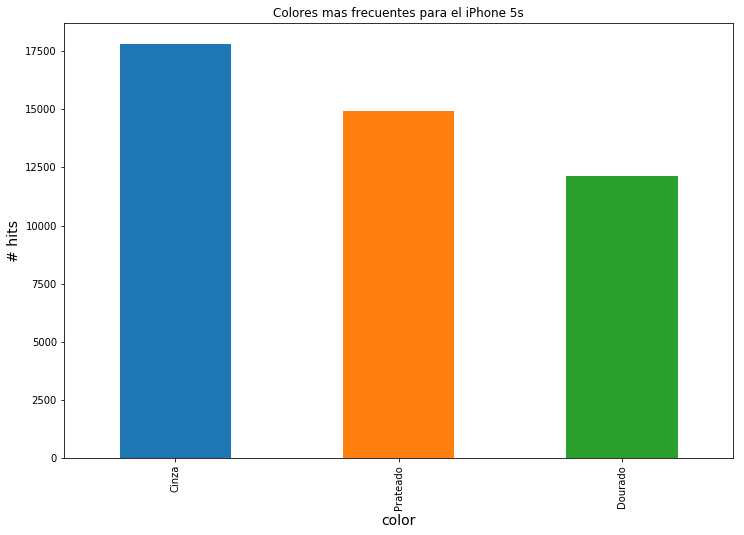

In [18]:
plot = df.loc[df['model']=="iPhone 5s",:].groupby('color_simple').size().sort_values(0,ascending=False).head(10).\
    plot(kind='bar',title='Colores mas frecuentes para el iPhone 5s',rot=90,figsize=(12,8))
plot.set_xlabel("color", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)

Text(0,0.5,u'# hits')

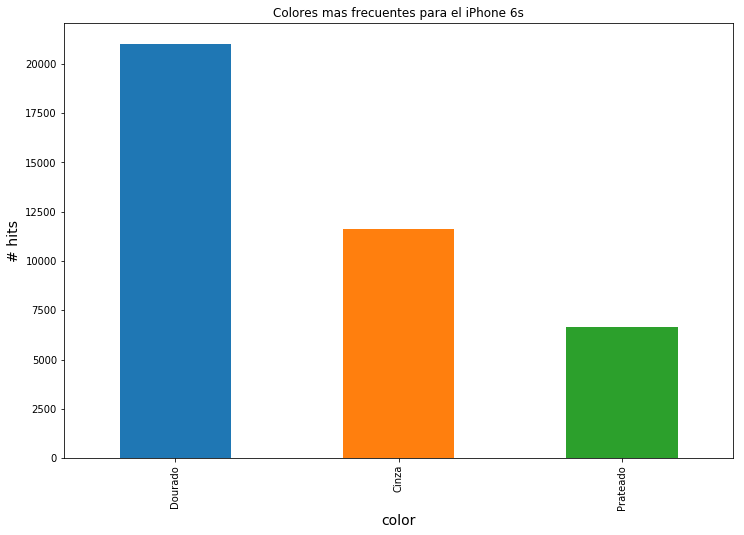

In [19]:
plot = df.loc[df['model']=="iPhone 6S",:].groupby('color_simple').size().sort_values(0,ascending=False).head(10).\
    plot(kind='bar',title='Colores mas frecuentes para el iPhone 6s',rot=90,figsize=(12,8))
plot.set_xlabel("color", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)

Text(0,0.5,u'# hits')

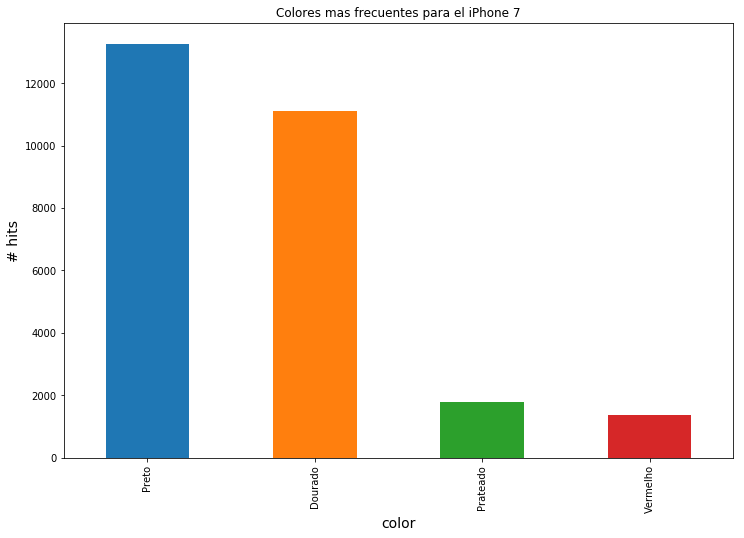

In [20]:
plot = df.loc[df['model']=="iPhone 7",:].groupby('color_simple').size().sort_values(0,ascending=False).head(10).\
    plot(kind='bar',title='Colores mas frecuentes para el iPhone 7',rot=90,figsize=(12,8))
plot.set_xlabel("color", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)

Text(0,0.5,u'# hits')

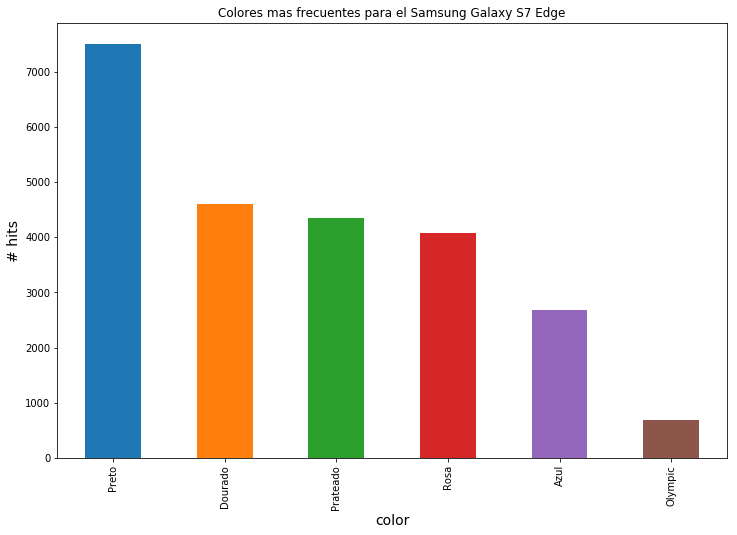

In [21]:
plot = df.loc[df['model']=="Samsung Galaxy S7 Edge",:].groupby('color_simple').size().sort_values(0,ascending=False).head(10).\
    plot(kind='bar',title='Colores mas frecuentes para el Samsung Galaxy S7 Edge',rot=90,figsize=(12,8))
plot.set_xlabel("color", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)

Text(0,0.5,u'# hits')

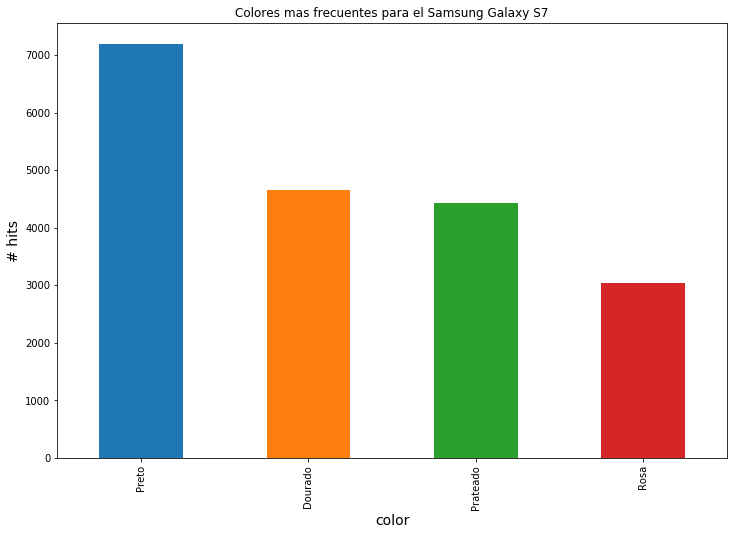

In [22]:
plot = df.loc[df['model']=="Samsung Galaxy S7",:].groupby('color_simple').size().sort_values(0,ascending=False).head(10).\
    plot(kind='bar',title='Colores mas frecuentes para el Samsung Galaxy S7',rot=90,figsize=(12,8))
plot.set_xlabel("color", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)

In [8]:
def modelo(obj):
    if(pd.isnull(obj)):
        return obj
    
    list = obj.split(" ")
    if len(list) == 1:
        return obj
    if "iPhone" in list:
        return "iPhone"
    if "Samsung" in list:
        return "Samsung"
    if "Motorola" in list:
        return "Motorola"
    return obj

df['model'] = df['model'].apply(modelo)
    

In [9]:
df['model'].value_counts()

iPhone                         256585
Samsung                        218127
Motorola                        63518
Lenovo Vibe K5                   2751
Lenovo Vibe A7010 Dual Chip      2028
Sony Xperia Z3 Plus              1548
LG G4 H818P                      1306
LG G5 SE                         1183
LG G3 D855                       1122
Sony Xperia M4 Aqua Dual         1033
LG L Prime D337                   941
LG K10 Novo                       927
Sony Xperia Z3 Dual               910
LG K10 TV                         900
Sony Xperia Z5                    797
Sony Xperia Z2                    793
Asus Zenfone 5                    729
Sony Xperia Z3 TV                 714
Sony Xperia Z3 Compact            700
Asus Zenfone 6                    590
LG G4 H815P                       568
LG Prime Plus H522                468
iPad Air Wi-Fi + 4G               410
Quantum GO 4G                     376
LG G3 Beat D724                   323
LG G4 Beat H736                   319
iPad Air 2 W

Text(0,0.5,u'# hits')

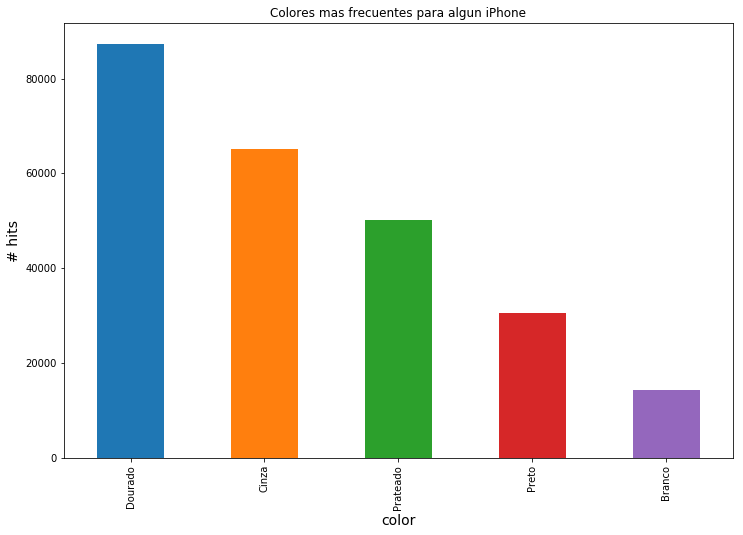

In [29]:
plot = df.loc[df['model']=="iPhone",:].groupby('color_simple').size().sort_values(0,ascending=False).head(5).\
    plot(kind='bar',title='Colores mas frecuentes para algun iPhone',rot=90,figsize=(12,8))
plot.set_xlabel("color", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)

Text(0,0.5,u'# hits')

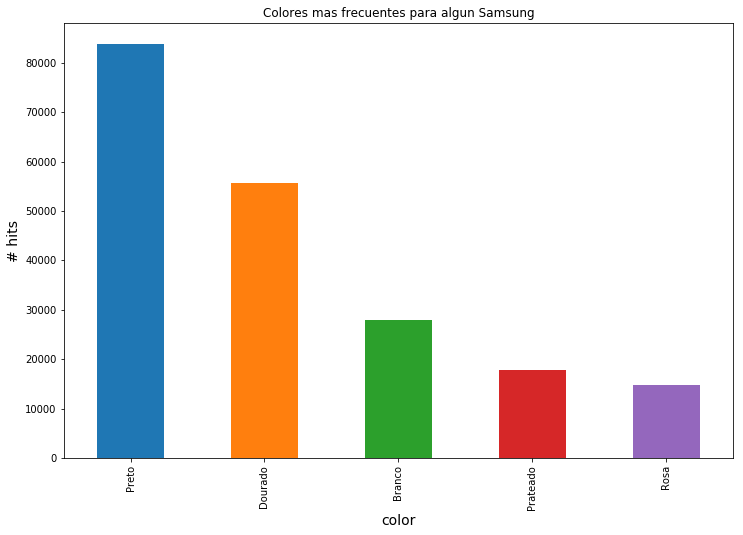

In [30]:
plot = df.loc[df['model']=="Samsung",:].groupby('color_simple').size().sort_values(0,ascending=False).head(5).\
    plot(kind='bar',title='Colores mas frecuentes para algun Samsung',rot=90,figsize=(12,8))
plot.set_xlabel("color", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)

Text(0,0.5,u'# hits')

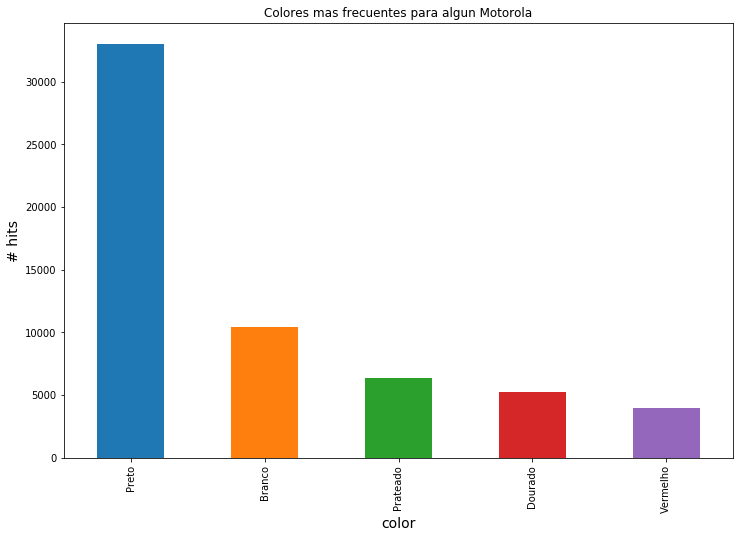

In [31]:
plot = df.loc[df['model']=="Motorola",:].groupby('color_simple').size().sort_values(0,ascending=False).head(5).\
    plot(kind='bar',title='Colores mas frecuentes para algun Motorola',rot=90,figsize=(12,8))
plot.set_xlabel("color", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)

In [3]:
df.dropna(subset=['condition'])

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,2018-04-09 20:13:14,viewed product,000a54b2,NaN,12661.0,Motorola Moto Z Play,Muito Bom,32GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,2018-05-24 11:27:47,viewed product,000a54b2,NaN,10254.0,iPhone 7 Plus,Excelente,256GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,2018-05-24 11:28:59,viewed product,000a54b2,NaN,6581.0,iPhone 6S,Bom,16GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,2018-05-24 11:29:06,viewed product,000a54b2,NaN,6579.0,iPhone 6S,Excelente,16GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,2018-05-24 11:29:14,viewed product,000a54b2,NaN,6580.0,iPhone 6S,Muito Bom,16GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,2018-05-24 11:29:16,viewed product,000a54b2,NaN,6581.0,iPhone 6S,Bom,16GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0,0.5,u'# hits')

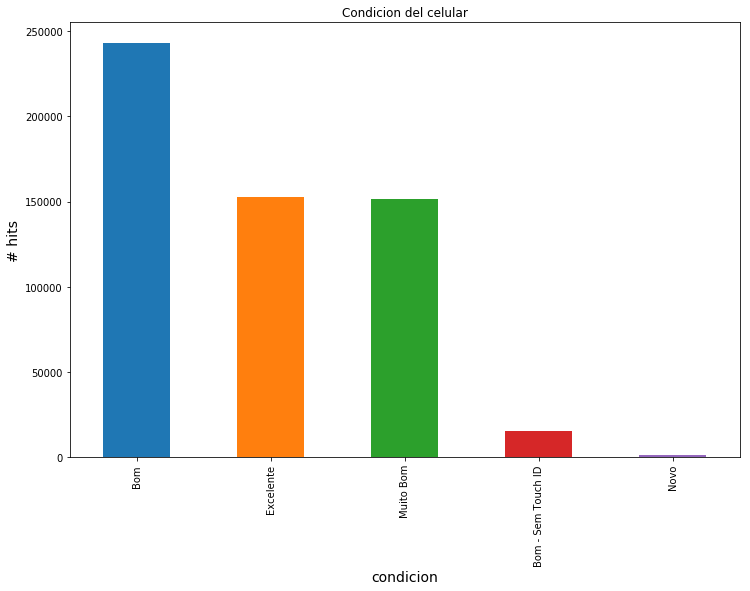

In [6]:
plot = df.groupby('condition').size().sort_values(0,ascending=False).head().\
    plot(kind='bar',title='Condicion del celular',rot=90,figsize=(12,8))
plot.set_xlabel("condicion", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)

In [7]:
df['condition'].value_counts()

Bom                   243014
Excelente             152977
Muito Bom             151359
Bom - Sem Touch ID     15295
Novo                    1191
Name: condition, dtype: int64

Text(0,0.5,u'# hits')

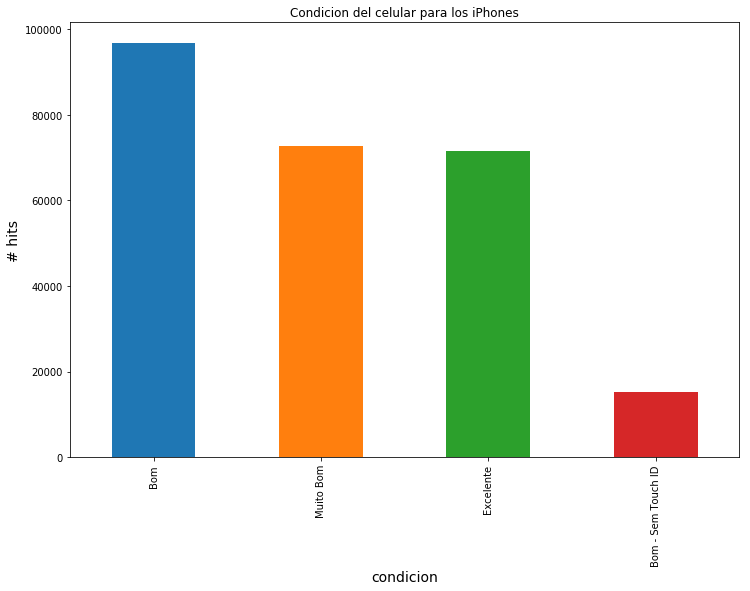

In [11]:
plot = df.loc[df['model']=="iPhone",:].groupby('condition').size().sort_values(0,ascending=False).head().\
    plot(kind='bar',title='Condicion del celular para los iPhones',rot=90,figsize=(12,8))
plot.set_xlabel("condicion", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)

Text(0,0.5,u'# hits')

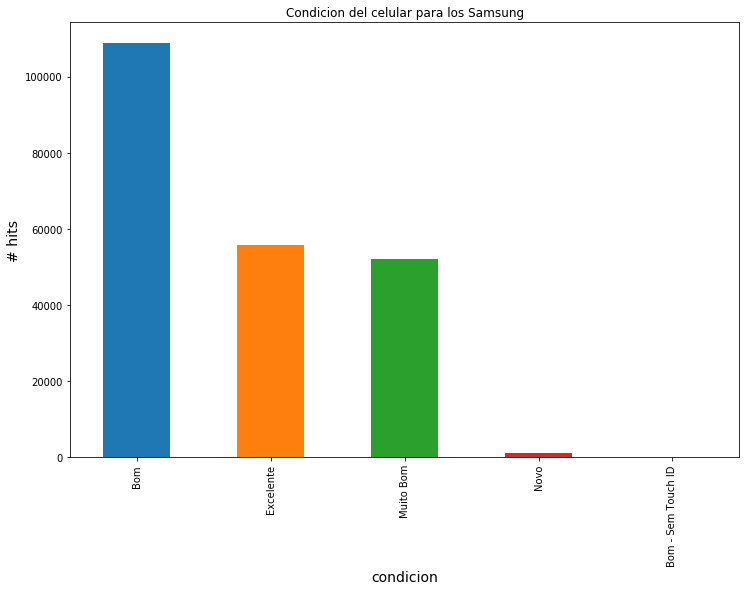

In [12]:
plot = df.loc[df['model']=="Samsung",:].groupby('condition').size().sort_values(0,ascending=False).head().\
    plot(kind='bar',title='Condicion del celular para los Samsung',rot=90,figsize=(12,8))
plot.set_xlabel("condicion", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)

Text(0,0.5,u'# hits')

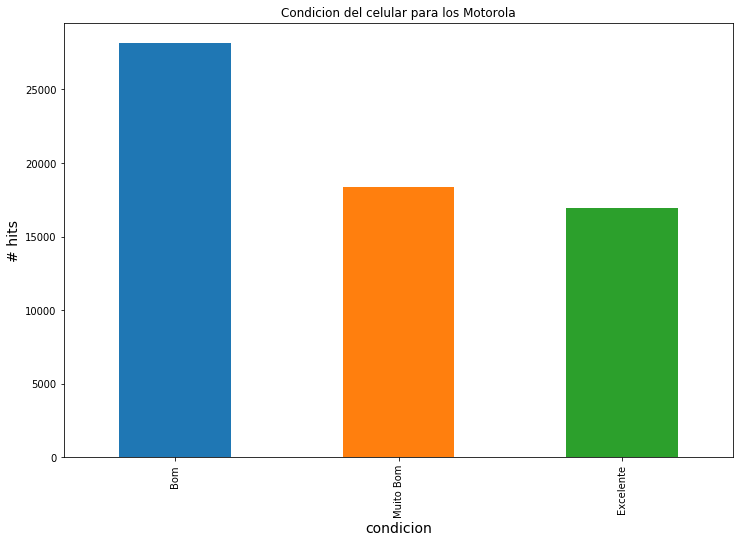

In [13]:
plot = df.loc[df['model']=="Motorola",:].groupby('condition').size().sort_values(0,ascending=False).head().\
    plot(kind='bar',title='Condicion del celular para los Motorola',rot=90,figsize=(12,8))
plot.set_xlabel("condicion", fontsize=14)
plot.set_ylabel("# hits", fontsize=14)